## Banco de dados
### Usando SQLite com Python

Vamos criar um banco de dados usando o Python com o SGBD SQLite

In [12]:
# vamos excluir o banco de dados caso ele exista
import os

os.remove("escola.db") if os.path.exists("escola.db") else None

In [43]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [13]:
# importar o módulo do SQLite

import sqlite3

In [14]:
# criar uma conexao com o banco caso ele exista, caso contrário é criado

con = sqlite3.connect('escola.db')

In [15]:
type(con)

sqlite3.Connection

In [16]:
# para percorrer registros de tabelas de bancos de dados
# criamos um cursor, antes mesmo de criar o banco
# pois é diferente da conexão, onde nos conectamos ao arquivo para
# poder alterá-lo

cur = con.cursor()

In [17]:
type(cur)

sqlite3.Cursor

In [19]:
# um comando sql sendo armanazenado em uma variavel do tipo string

sql_create = "create table cursos (id integer primary key, titulo varchar (100), categoria varchar (140), alunos integer)"

In [20]:
cur.execute(sql_create)

In [21]:
sql_insertion = "insert into cursos values (?, ?, ?, ?)"

In [22]:
dados = [
    (100, 'Analise e Desenvolvimento de Sistemas', 'Tecnologia', 120),
    (101, 'Gestao de Tecnologia da Informação', 'Tecnologia', 115),
    (102, 'Processos Quimicos', 'Ciencia', 220)
]

In [23]:
for each in dados:
    cur.execute(sql_insertion, each)

In [25]:
# outra forma de inserir

cur.execute("INSERT INTO cursos VALUES (103, 'Engenharia da Computação', 'Engenharia', 189)")

In [27]:
# outra forma de inserir, pode usar variaveis tambem

cur.execute("INSERT INTO cursos VALUES (?, ?, ?, ?)", (104, 'Engenharia Elétrica', 'Engenharia', 201))

In [28]:
# grava a transação caso a conexão com o banco de dados caia
con.commit()

In [29]:
# uma das formas de demonstrar 

sql_select = "select * from cursos"

In [30]:
# executando o código do select precisamos dar um fetchall(), o qual podemos inseri-lo em uma variavel

cur.execute(sql_select)
data = cur.fetchall()

In [31]:
for linha in data:
    print(linha)

(100, 'Analise e Desenvolvimento de Sistemas', 'Tecnologia', 120)
(101, 'Gestao de Tecnologia da Informação', 'Tecnologia', 115)
(102, 'Processos Quimicos', 'Ciencia', 220)
(103, 'Engenharia da Computação', 'Engenharia', 189)
(104, 'Engenharia Elétrica', 'Engenharia', 201)


In [32]:
# retornando apenas a coluna da categoria
cur.execute("SELECT * FROM cursos")
for linha in cur.fetchall():
    print(linha[2])

Tecnologia
Tecnologia
Ciencia
Engenharia
Engenharia


In [33]:
# outra maneira apenas usando o código SQL
cur.execute("SELECT categoria FROM cursos")
for linha in cur.fetchall():
    print(linha)

('Tecnologia',)
('Tecnologia',)
('Ciencia',)
('Engenharia',)
('Engenharia',)


In [34]:
cur.execute("SELECT * FROM cursos WHERE categoria='Engenharia'")
for linha in cur.fetchall():
    print(linha)

(103, 'Engenharia da Computação', 'Engenharia', 189)
(104, 'Engenharia Elétrica', 'Engenharia', 201)


In [52]:
# atualizando dados

cur.execute("UPDATE cursos SET id= 105 WHERE id = 104")
con.commit()

In [56]:
# excluindo dados

cur.execute("DELETE FROM cursos WHERE id=105")
con.commit()

<IPython.core.display.Javascript object>


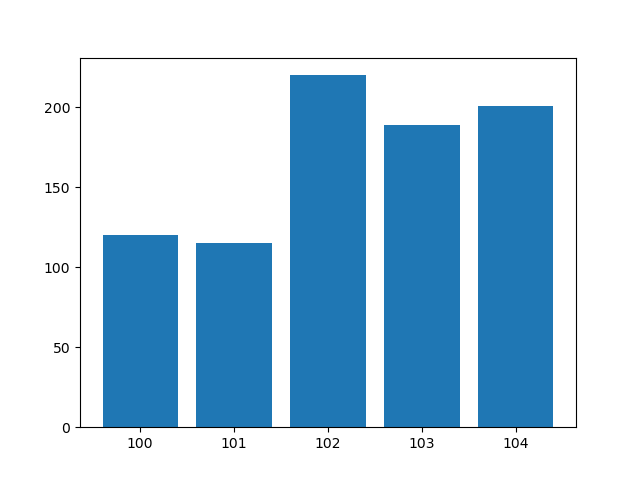

In [45]:
# criando um grafico

cur.execute("SELECT id, alunos FROM cursos")
dados = cur.fetchall()
ids = [x[0] for x in dados]
alunos = [x[1] for x in dados]

# grafico de barras
plt.bar(ids, alunos)
plt.show()

In [11]:
con.close()